IRIS Dataset
============

20/03/2018

>data: https://archive.ics.uci.edu/ml/datasets/Iris

>info: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names


## PROBLEM

Given sizes of sepal and petal, can you classify which species of Iris it's from?

By the way, here's a image of a flower with sepal and petal:

<p align="center"><img src="./img/sepal-petal.jpg" alt="Drawing"| style="height: 300px;"/></p>

## WHY I chose this data set

* this is the first data set I used when I learnt machine learning
* small, simple and clean data set
* typical test case for machine learning techniques

```
Data Cleaness:  Very Clean
Pre-processing: Minimal
Problem Type:   Classification
Difficulty:     Easy
```

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
sns.set_context("poster")

Read in data

In [2]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_table('data-iris.txt', delimiter=',', names=col_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Description

In [3]:
print('Data size: {} \n'.format(df.shape))
print('Data type: \n{} \n'.format(df.dtypes))

Data size: (150, 5) 

Data type: 
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object 



## Data Cleaning

Data is pretty clean, it's a simple data set and pre-processed before publish. But we still can do the following:

1. Remove `Iris-` in the `class` values
2. Convert `class` to category data type (reduce memory usage)

In [4]:
df['class'] = df['class'].str.replace('Iris-', '')
df['class'] = df['class'].astype('category')

### Summarise the data for different classes

In [5]:
classes = df['class'].unique()
dfs = []
for cls in classes:
    print('\nPlant type: {}\n'.format(cls))
    print(df[df['class'] == cls].describe())
    
print('\nQuick summary for each class: \n')
df.groupby('class').mean()


Plant type: setosa

       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Plant type: versicolor

       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.3

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


A better approach would be visulize the data instead of looking at the numbers

### Visulization - Sepal sizes and Petal Sizees

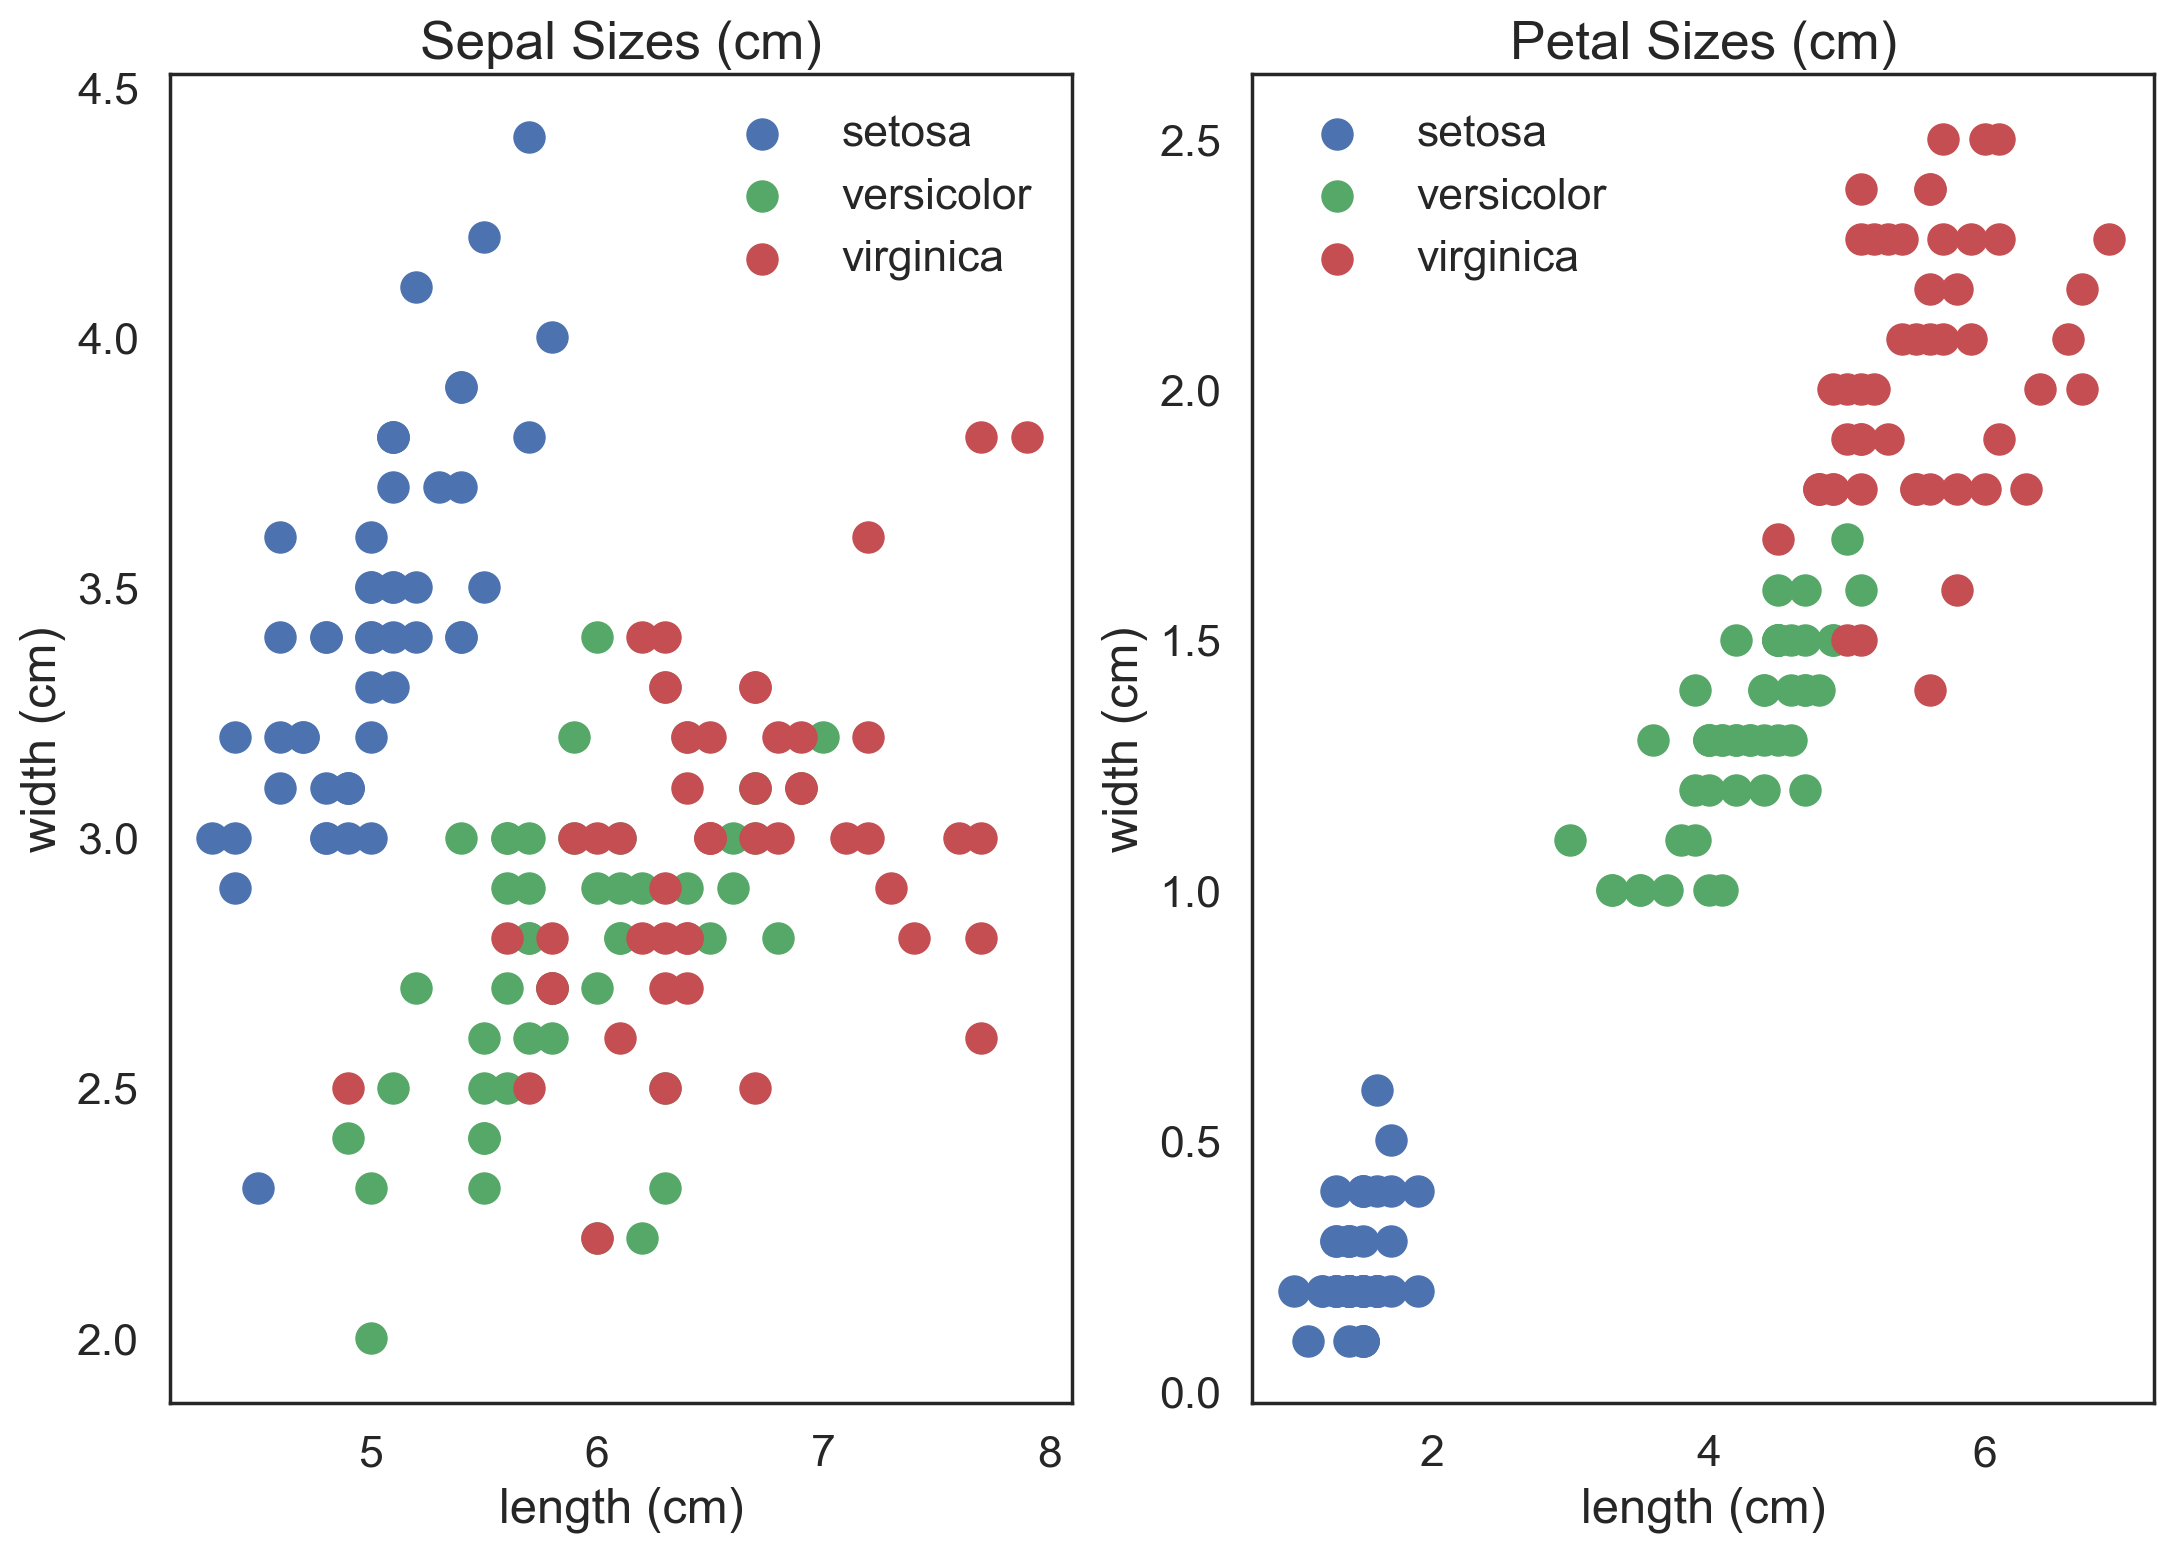

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=200)

# plot sepal length v width

ax1.set_title('Sepal Sizes (cm)')
for cls in classes:
    d = df[df['class'] == cls]
    ax1.scatter(d['sepal_length'], d['sepal_width'], label=cls)

ax1.set_xlabel('length (cm)')
ax1.set_ylabel('width (cm)')
ax1.legend()

# plot petal length v width

ax2.set_title('Petal Sizes (cm)')
for cls in classes:
    d = df[df['class'] == cls]
    ax2.scatter(d['petal_length'], d['petal_width'], label=cls)
    
ax2.set_xlabel('length (cm)')
ax2.set_ylabel('width (cm)')
ax2.legend()

or use the `pairplot` function in seaborn to plot a scatter matrix

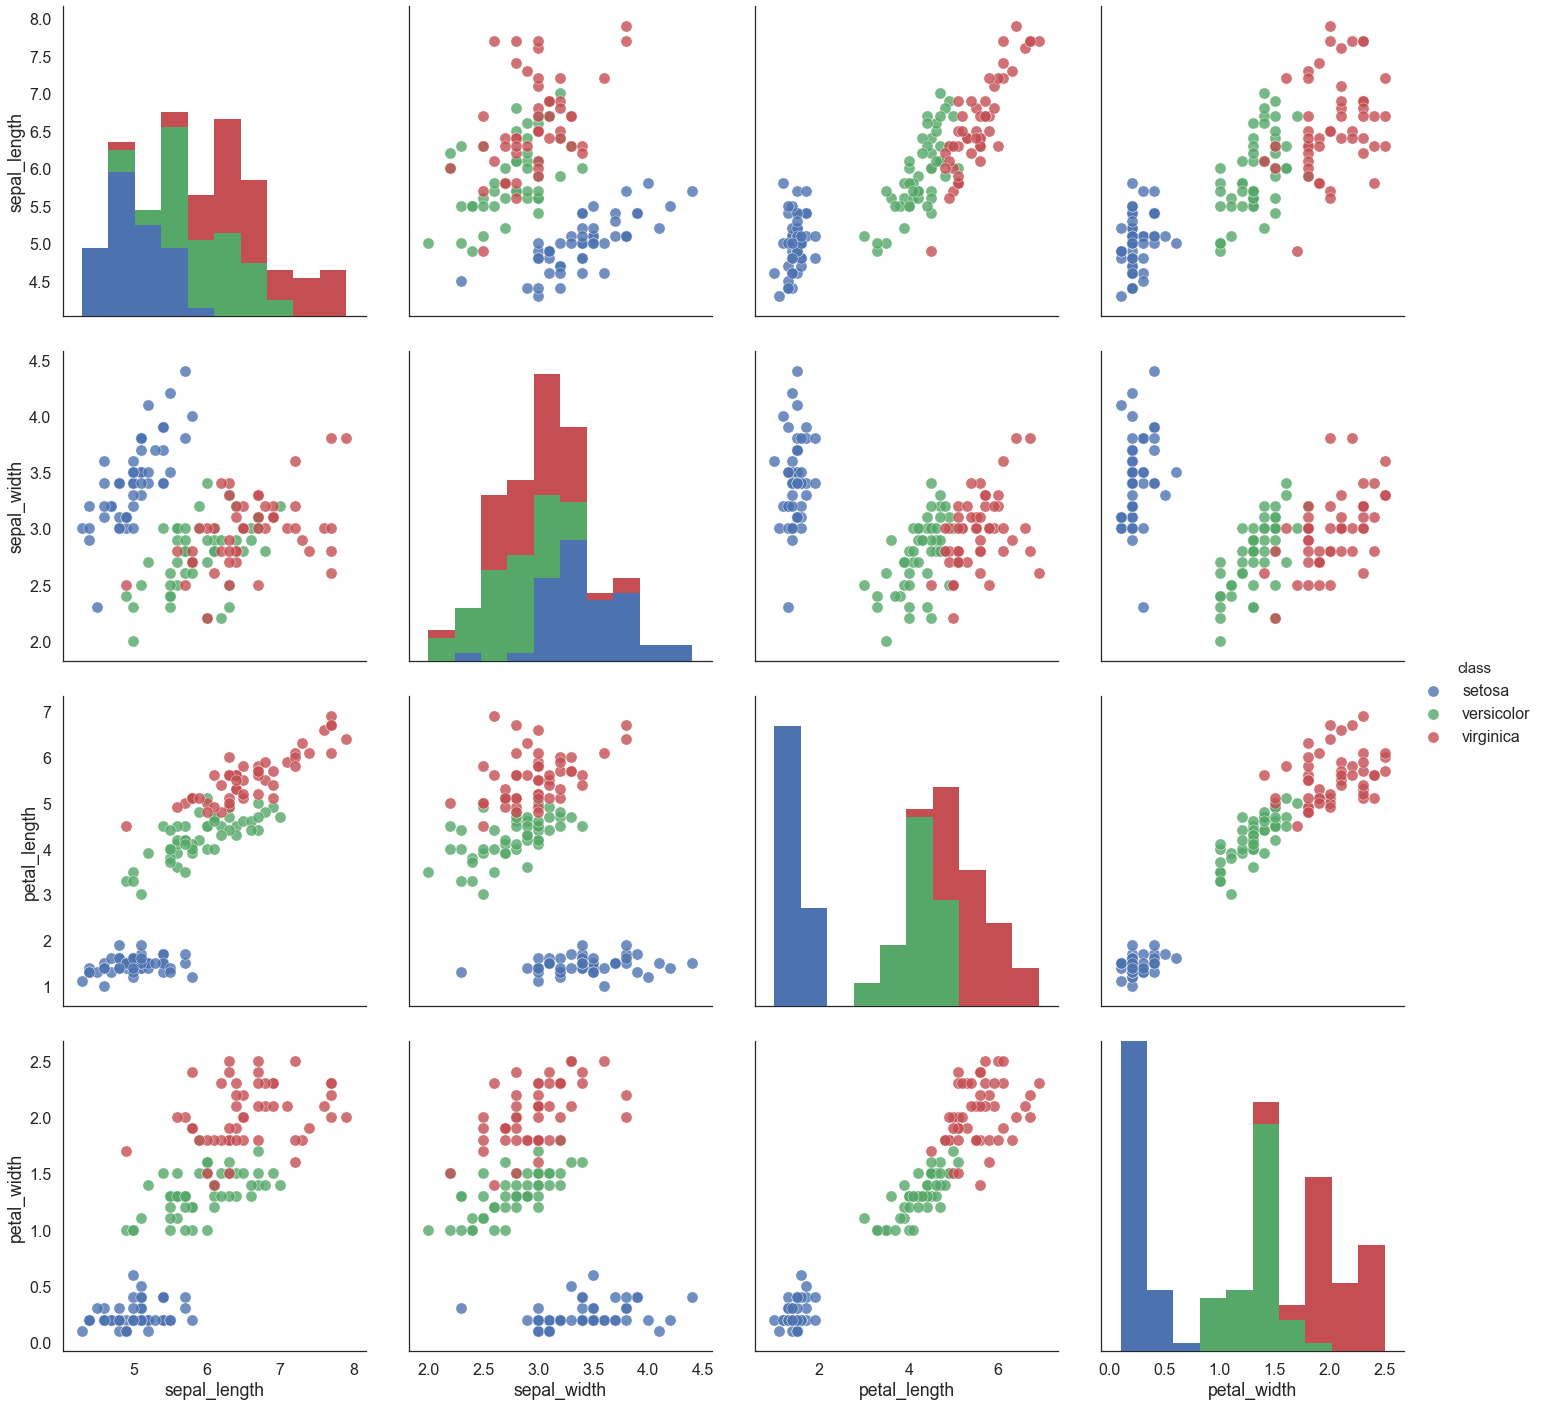

In [7]:
sns.pairplot(df, hue='class', size=5, plot_kws=dict(alpha=0.8))

What does it tell?

* __setosa__ has distinctive petal and sepal sizes
* although __versicolor__ and __virginica__ have similar sepal sizes, petal sizes can be used to dintinguish the two

This is a classification problem with each class having distinct boundaries. K nearest neighbor classifier seems suitable for this problem. Note that telling the difference between versicolor and virginica would be more difficult compared to isolating setosa.

## Classification Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

Note: Score = number of correct prediction over total number of prediction

$$Score = \dfrac{\# correct}{\# total}$$

In [11]:
score = knn_model.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(score))

Accuracy: 0.92


Score seems too good to be true, but hey, it's a simple dataset